# Using NumPy: Introduction and a worked example

Read through the following notes carefully, and run each of these cells to get an idea of how NumPy works.

We import `numpy` as below, and then we can access all Numpy functions from using `np.<function>`:

In [1]:
# np is the conventional name for numpy
import numpy as np
np.set_printoptions(suppress=True, precision=2) # configure printing

# Basic array creation

`np.array()` takes a *sequence* and converts it into an `ndarray`; this can be, for example, an ordinary Python list:
    

In [2]:
## a simple vector: np.array converts iterable sequences to arrays
n_list = [1.0, 2.0, 3.0]
n_array = np.array(n_list)
print(n_array, type(n_array)) # this is now an array


[1. 2. 3.] <class 'numpy.ndarray'>


## Shape
`ndarrays` hold *rectangular* blocks of numbers. They can have any number of dimensions: 1D vectors, 2D matrices, 3D and higher tensors.

All ndarrays have a **shape**, which is the number of elements in each dimension. You can always find
the shape of an existing array by calling `a.shape()` on an array `a`. This list is just three elements, so its shape is just `(3,)` (a 3 element vector):

In [3]:
print(n_array.shape)

(3,)


### Multidimensional arrays
This extends to creating multidimensional arrays, using nested sequences (e.g. list-of-lists). However, arrays must be **rectangular**; they cannot be *ragged*, where there are different numbers of columns per row.

In [4]:
# using nested lists to create a 2D array (a matrix)
a = np.array([
                [1.0, 2.0, 3.0],
                [0.0, 0.5, 0.0],
                [5.0, 0.0, 10.0]
               ])

print(a)

[[ 1.   2.   3. ]
 [ 0.   0.5  0. ]
 [ 5.   0.  10. ]]


In [5]:
print(a.shape)

(3, 3)


NumPy supports arbitrary dimensioned arrays. So we can create a `2x2x2` array of numbers:

In [6]:
a = np.array([
                [[1.0, 1.0],
                 [4.0, 4.0]],
                [[2.0, 2.0],
                 [3.0, 3.0]],                
               ])
print(a)

[[[1. 1.]
  [4. 4.]]

 [[2. 2.]
  [3. 3.]]]


In [7]:
print(a.shape)

(2, 2, 2)


## Blank arrays
It's often useful to create arrays which are "blank", in the sense they are filled with equal values (particularly, filled with all zeros). There are array functions that will be produce such arrays very efficiently. They just take the shape of the desired array and return a fully populated array:

* `np.zeros(shape)` will create an array of a given **shape** and fill it with zeros. 
* `np.ones(shape)` does the same and fills it with ones (1.0).
* `np.full(shape, value)` fills a new array with the given value.
* `np.empty(shape)` creates a new array, but doesn't fill it. This will have whatever was in the memory before, so while it's very efficient, it's only useful when you expect to overwrite the array values.

### Shapes are tuples
Note: the `shape` is a **tuple**, written in round brackets like this: `(3,4)` or `(3,)`.

* **Don't** call `np.zeros(3,4)`: this calls `np.zeros` with two arguments 
* **Do** call `np.zeros((3,4))`: this calls `np.zeros` with one argument, a shape tuple.


In [8]:
print(np.zeros((5,))) # a 5 element vector of zeros

[0. 0. 0. 0. 0.]


In [9]:
print(np.zeros((3,3))) # a 3x3 matrix of zeros

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [10]:
print(np.zeros((6,2))) # a 6x2 matrix of zeros

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [11]:
print(np.ones((2,2))) #  a 2x2 matrix of ones

[[1. 1.]
 [1. 1.]]


In [14]:
print(np.full((1,5,1), 9)) # a 1x5x1 array of 9s

[[[9]
  [9]
  [9]
  [9]
  [9]]]


In [15]:
np.full((2,2,2), -1.0) # 2x2x2 array filled with -1

array([[[-1., -1.],
        [-1., -1.]],

       [[-1., -1.],
        [-1., -1.]]])

In [18]:
print(np.empty(8,)) # 8 element vector -- note the values will be random junk!

[1. 1. 1. 1. 1. 1. 1. 1.]


## Singleton axes
**Note**: a (1,5,1) array is different from a (1,5) array and different from a (5,) array. Array dimension sizes can be 1. 

We call each dimension of an array an **axis**, and any **axis** which is just one element is called a **singleton axis**.


In [19]:
# these are all differently shaped arrays, even though they all contain exactly five elements
print(np.zeros((1,5,1)).shape) 
print(np.zeros((1,5)).shape) 
print(np.zeros((5,)).shape) 

(1, 5, 1)
(1, 5)
(5,)


### zeros_like
It is often handy to create a new array which is the same type and shape as an existing array, but initialised to all zeros (or all ones). This is useful, for example, when accumulating counts in an array the same size as some original input (e.g. counting number of pixels that are blue or green)

`np.zeros_like()` does this. There are equivalent `ones_like` and `full_like` as well.

In [20]:
x = np.array([[1.0,2.0,3.0], 
              [4.0,5.0,6.0]], dtype=np.float64)
print(x)

[[1. 2. 3.]
 [4. 5. 6.]]


In [21]:

zeros_like_x = np.zeros_like(x)
print(zeros_like_x)

[[0. 0. 0.]
 [0. 0. 0.]]


## arange
Another useful kind of generated array is a range of numbers, increasing over a span.

We can create a vector of increasing values using `arange` (**a**rray **range**), which works like the built in Python function `range` does, but returns an 1D array (a vector) instead of a list.

`np.arange()` takes one to three parameters:
* `np.arange(end)`  -- returns a vector of numbers 0..end-1
* `np.arange(start, end)`  -- returns a vector of numbers start..end-1
*  `np.arange(start, end, step)` --returns a vector of numbers start..end-1, incrementing by step (which may be **negative** and/or **fractional**!)


In [3]:
np.arange(10)  # [0-10) (excluding 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.arange(2, 8) # 2,3,4,5,6,7 (no 8 -- the right endpoint is never included!)

array([2, 3, 4, 5, 6, 7])

In [5]:
np.arange(0,10,2) # even numbers 0-10

array([0, 2, 4, 6, 8])

In [6]:
np.arange(10,0,-2) # even numbers backwards stopping at *2* 
# (be careful and remember the right endpoint rule!)

array([10,  8,  6,  4,  2])

In [7]:
np.arange(0,10,0.25) # 0 to 10, incrementing by 0.25

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75])

In [8]:
np.arange(0.3, 10.21, 0.95) # all points can be fractional

array([0.3 , 1.25, 2.2 , 3.15, 4.1 , 5.05, 6.  , 6.95, 7.9 , 8.85, 9.8 ])

### Loading and saving arrays
`np.loadtxt(fname)` and `np.savetxt(arr, fname)` are simple functions to load and save single 1D or 2D arrays as ordinary text files.

In [9]:
sunspots = np.loadtxt("../data/sunspots.csv", delimiter=',') # comma separated
print(sunspots.shape, sunspots.dtype)

(2820, 3) float64


In [10]:
# write to a file, then see what is in it
# a new, blank array
x = np.array([[1,2,3,4], [5,6,7,8]])
# write to "test_array.txt"
np.savetxt("test_array.txt", x)

# print out the contents of the file
# will be space separated by default, in scientific notation
print("test_array.txt")
# this is just the raw contents of the file
with open("test_array.txt") as f:
    print((f.read()))

test_array.txt
1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
5.000000000000000000e+00 6.000000000000000000e+00 7.000000000000000000e+00 8.000000000000000000e+00



## Random arrays
We can also generate random numbers to fill arrays. Many algorithms use arrays of
random numbers as their basic "fuel". 

Useful random array functions include:
* `np.random.randint(a,b,shape)` creates an array with uniform random *integers* between a and (excluding) b
* `np.random.uniform(a,b,shape)` creates an array with uniform random *floating point* numbers between a and b
* `np.random.normal(mean,std,shape)` creates an array with normally distributed random floating point numbers between with the given mean and standard deviation.

In [11]:
np.random.randint(1,7,(5,5)) # 5x5 array o numbers from 1 through 6 (e.g. dice rolls)

array([[4, 1, 6, 3, 3],
       [2, 4, 1, 4, 5],
       [1, 3, 3, 6, 3],
       [5, 4, 6, 6, 3],
       [5, 2, 3, 4, 4]])

In [15]:

np.random.uniform(0,1,(3,)) # 3 element vector of values from 0-1

array([0.61, 0.72, 0.17])

In [16]:
# 3 element vector of values, normally distributed with mean 0, standard deviation 1.0
np.random.normal(0,1,(3,)) 

array([-0.54,  0.81, -0.78])

## Joining and stacking
We can also join arrays together. But unlike simple structures like lists, we have to explicitly state on which **dimension** we are going to join. 

### concatenate and stack
Because arrays can be joined together along different axes, there are two distinct kinds of joining:
* We can use `concatenate` to join along an *existing* dimension;
* or `stack` to stack up arrays along a *new dimension.*

In [17]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])
print("Stacked two 1D -> 2D")
print((np.stack([x,y])))

Stacked two 1D -> 2D
[[1 2 3 4]
 [5 6 7 8]]


In [18]:
print("Concatenated two 1D -> 1D")
print((np.concatenate([x,y])))

Concatenated two 1D -> 1D
[1 2 3 4 5 6 7 8]


In [19]:
# when we have multiple dimensions, we can specify explicitly
# which axis to join on
x = np.zeros((3,3))
y = np.ones((3,3))

In [20]:
print("Joined on rows")
print(np.concatenate([x,y], axis=0))  # join on rows

Joined on rows
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [21]:
print("Joined on columns")
print(np.concatenate([x,y], axis=1))  # join on columns

Joined on columns
[[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


In [22]:
print("Joined by stacking")
print(np.stack([x,y]))

Joined by stacking
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


## Tiling
We often need to be able to **repeat** arrays. This is called **tiling** and `np.tile(a, tiles)` will repeat `a` in the shape given by `tiles`, joining the result together into a single array.

In [23]:
eye = np.array([[1.,0.], [0.,1]])
print(eye)

[[1. 0.]
 [0. 1.]]


In [24]:
print("Repeated 3 times, columns")
np.tile(eye, (1,3))

Repeated 3 times, columns


array([[1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1.]])

In [25]:
print("Repeated 3 times, rows")
np.tile(eye, (3,1))

Repeated 3 times, rows


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [26]:
print("Repeated 2x2 times")
np.tile(eye, (2,2))

Repeated 2x2 times


array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]])

# Worked example

### Tabular Data
Many data can be naturally thought of as arrays. For example, a very common structure is a spreadsheet like arrangement of data in tables, with rows and columns.
Each row is an **observation**, and each column is a **variable**.

Here we will use a simple dataset, *"Wheat prices in England, 1565-1810"* by **William Playfair**.

We will ask some basic questions about this, and answer them via NumPy. This will introduce slicing and indexing, arithmetic, aggregation/reduction and accumulation. We will also see some basic plotting commands to generate graphs: you do not need to learn these at this point.

In [27]:
# the price of wheat 1565-1810 in format:
#      index, year, wheat price, weekly wage
# price: shillings per quarter bushel
# wage: shillings per week

# load a text file, store in the variable wheat, and print it out
wheat = np.loadtxt("../data/Wheat.csv", delimiter=",")
print(wheat)

[[   1.   1565.     41.      5.  ]
 [   2.   1570.     45.      5.05]
 [   3.   1575.     42.      5.08]
 [   4.   1580.     49.      5.12]
 [   5.   1585.     41.5     5.15]
 [   6.   1590.     47.      5.25]
 [   7.   1595.     64.      5.54]
 [   8.   1600.     27.      5.61]
 [   9.   1605.     33.      5.69]
 [  10.   1610.     32.      5.78]
 [  11.   1615.     33.      5.94]
 [  12.   1620.     35.      6.01]
 [  13.   1625.     33.      6.12]
 [  14.   1630.     45.      6.22]
 [  15.   1635.     33.      6.3 ]
 [  16.   1640.     39.      6.37]
 [  17.   1645.     53.      6.45]
 [  18.   1650.     42.      6.5 ]
 [  19.   1655.     40.5     6.6 ]
 [  20.   1660.     46.5     6.75]
 [  21.   1665.     32.      6.8 ]
 [  22.   1670.     37.      6.9 ]
 [  23.   1675.     43.      7.  ]
 [  24.   1680.     35.      7.3 ]
 [  25.   1685.     27.      7.6 ]
 [  26.   1690.     40.      8.  ]
 [  27.   1695.     50.      8.5 ]
 [  28.   1700.     30.      9.  ]
 [  29.   1705.     

Every array has a **shape** and a **datatype**. We can print these out:

In [28]:
print("shape", wheat.shape)
print("dtype", wheat.dtype)

shape (50, 4)
dtype float64


This tells us we have a 50 rows x 4 columns array of floating point numbers

We can plot this in a graph:

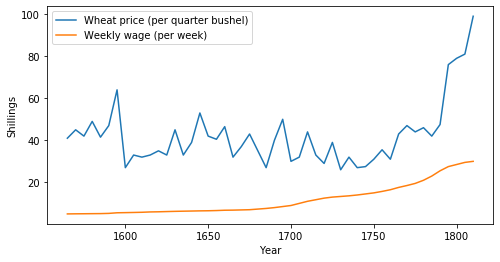

In [29]:
# import plotting
import matplotlib.pyplot as plt
%matplotlib inline

# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
# plot the wheat price against the year
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price (per quarter bushel)")
# plot the wage of skilled mechanic  against the year
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage (per week)")
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
# add a legend
ax.legend()


We have selected pairs of columns to plot; for example `wheat[:,1]` selects the second column, the years. This is an example of slicing.

We can select any subparts of this array using **slice notation**, using square brackets. This is like indexing an array, but we can also select rectangular subregions.

In [30]:
print("first row", wheat[0,:]) # : means everything

first row [   1. 1565.   41.    5.]


In [31]:
print("second column", wheat[:,1]) # note: order is rows then columns

second column [1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615. 1620.
 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675. 1680.
 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735. 1740.
 1745. 1750. 1755. 1760. 1765. 1770. 1775. 1780. 1785. 1790. 1795. 1800.
 1805. 1810.]


This uses **slicing syntax** to select a specific part of the array.
    
#### Zero indexing
Note that NumPy arrays are indexed starting from `0`!


## Slicing
The slice notation
is very simple but powerful. You can give a range specifier for each dimension of the array inside square brackets (in this case we have a 2D array: rows x columns). 

A *range specifier* is of the form:

    start : stop : step
    
Where `start` is the index to start from, `stop` is the end, and `step` is the jump to make between each step. **Any of these parts can be omitted**.

* If `start` is missing, it defaults to 0
* If `end` is missing, it defaults to the last element
* If `step` is missing, it defaults to 1. You don't need to include the second colon if you are omitting step, though it's not an error to do so.

If there is no colon at all (just a number) then the slice takes that element only (start and end are equal). Let's see that in action:



In [32]:
print(wheat[5:10, :]) # select the 6th to 11th rows

[[   6.   1590.     47.      5.25]
 [   7.   1595.     64.      5.54]
 [   8.   1600.     27.      5.61]
 [   9.   1605.     33.      5.69]
 [  10.   1610.     32.      5.78]]


In [33]:
print(wheat[:10, 1:3]) # select first ten rows and second and third columns

[[1565.    41. ]
 [1570.    45. ]
 [1575.    42. ]
 [1580.    49. ]
 [1585.    41.5]
 [1590.    47. ]
 [1595.    64. ]
 [1600.    27. ]
 [1605.    33. ]
 [1610.    32. ]]


Slices wil give us back arrays. These have shapes, which we can look at

In [34]:
print(wheat[:10, 1:3].shape) # a 10 by 2 array

(10, 2)


We can access specific elements if we don't have any ranges in the slice, only definite numbers:

In [35]:
print(wheat[0, -1]) # the first row, last column; a specific number

5.0


## Arithmetic

We can do arithmetic on arrays in a single command, without any explicit iteration. We could compute a conversion of bushels into modern units, litres:

In [40]:
litres_bushels = 36.3687
price_quarter_bushels = wheat[:,2]  # slice
price_litre = (price_quarter_bushels * 4.0) / litres_bushels
# now print out the price in shillings per litre of wheat
print(price_litre)

[ 4.51  4.95  4.62  5.39  4.56  5.17  7.04  2.97  3.63  3.52  3.63  3.85
  3.63  4.95  3.63  4.29  5.83  4.62  4.45  5.11  3.52  4.07  4.73  3.85
  2.97  4.4   5.5   3.3   3.52  4.84  3.63  3.19  4.29  2.86  3.52  2.97
  3.02  3.41  3.9   3.41  4.73  5.17  4.84  5.06  4.62  5.22  8.36  8.69
  8.91 10.89]


Note that we are performing arithmetic on a whole array at once; that is we apply an operation *elementwise*. Lets' convert this further, to kilos, then plot the graph again:

In [41]:
wheat_kg_litre = 0.79 # about 0.79 kg of wheat in every litre
price_kg = price_litre * wheat_kg_litre

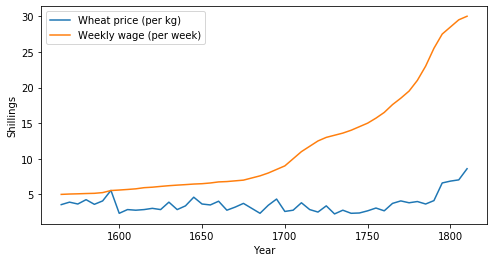

In [42]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
# plot the wheat price against the year
ax.plot(wheat[:,1], price_kg, label="Wheat price (per kg)")
# plot the wage of skilled mechanic  against the year
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage (per week)")
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
# add a legend
ax.legend()

## Elementwise arithmetic
Say we wanted to compute the ratio of the wheat price and the weekly wage; how many kilos of wheat could a skilled mechanic afford? This again is an arithmetic operation, but instead of an operation between a scalar and an array, it's an operation between two arrays of the same size. 

This again is applied **elementwise**, each element from one array being paired with a corresponding one from another.

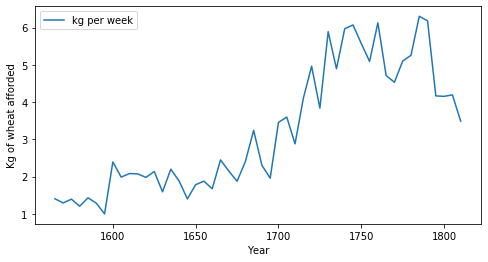

In [43]:
# note: an operation between two *arrays*
kg_per_week = wheat[:,3] / price_kg

# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

# plot the wheat price against the year
ax.plot(wheat[:,1], kg_per_week, label="kg per week")
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Kg of wheat afforded")
# add a legend
ax.legend()

## Aggregate operations
Say we want to know how much wheat a skilled mechanic could afford, *on average each week*,  between 1650 and 1700. This is an aggregation operation. First we can select that region:

In [44]:
# check we can find the right slice of the data
print(wheat[17:27,:])

[[  18.   1650.     42.      6.5 ]
 [  19.   1655.     40.5     6.6 ]
 [  20.   1660.     46.5     6.75]
 [  21.   1665.     32.      6.8 ]
 [  22.   1670.     37.      6.9 ]
 [  23.   1675.     43.      7.  ]
 [  24.   1680.     35.      7.3 ]
 [  25.   1685.     27.      7.6 ]
 [  26.   1690.     40.      8.  ]
 [  27.   1695.     50.      8.5 ]]


In [45]:
# now slice the corresponding part of our kg pricing
prices_1650_1700 = kg_per_week[17:27]

We can **sum** this data with `np.sum()`, which is equivalent to putting a `+` in between each element, and then divide by the number of elements using the `shape`.

In [46]:
print(np.sum(prices_1650_1700) / prices_1650_1700.shape[0])

2.1691354418865254


NumPy has a built in `mean` function that does the same thing:

In [47]:
print(np.mean(prices_1650_1700))

2.1691354418865254


### Multiple axes
You can specify a list of axes across which to operate when using an aggregate function. This is mainly used with arrays with more than two dimensions.

In [48]:
print(np.mean(wheat, axis=0)) # mean across rows, this is the mean for each variable, a useful summary

[  25.5  1687.5    42.14   11.58]


In [49]:
# it makes no sense to average together prices and years!
print(np.mean(wheat, axis=1)) # mean across columns, this is meaningless here

[403.   405.51 406.27 409.53 409.16 412.06 417.88 410.15 413.17 414.44
 416.24 418.25 419.28 423.81 422.32 425.34 430.36 429.12 430.27 433.31
 431.2  433.98 437.   436.57 436.15 441.   445.12 441.75 444.   448.75
 447.69 448.38 452.5  450.82 453.9  454.25 456.   458.5  461.3  461.88
 466.65 469.38 470.38 472.75 473.75 477.25 486.38 488.88 491.12 497.25]


## Finding things: Boolean arrays
This seems quite fragile, in that we had to specify `[17:27]` to select the years we were interested in. We can use Boolean tests to do this more cleanly. We can compare any array with a value or another array (these are just special cases of a more general rule) and get back an array of Booleans:

In [50]:
print(wheat[:,1]>=1650)

[False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [51]:
print(wheat[:,1]<1700)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False]


We can combine these together using logical operators. These are:
    * `np.logical_not(x)` inverts a Boolean array
    * `np.logical_and(x,y)` applies *and* to two arrays
    * `np.logical_or(x,y)` applies *or* to two arrays

In [52]:
print(np.logical_and(wheat[:,1]>=1650, wheat[:,1]<1700))

[False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False]


How does that help us? One thing we can do is use `np.nonzero()` to convert every `True` to it's corresponding index.

In [57]:
print(np.nonzero(np.logical_and(wheat[:,1]>=1650, wheat[:,1]<1700)))

(array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64),)


And we would see that `[17:27]` is the right slice to use (remember slices are inclusive of the first specifier, and exclusive of the second).

Even better, though, we can **directly index** an array with another array of Booleans; this will pull out only those values where the index array is `True`

In [56]:
selected_years = np.logical_and(wheat[:,1]>=1650, wheat[:,1]<1700) # a Boolean array
print(kg_per_week[selected_years])  # select all elements of prices_kg where selected_years is True

[1.78 1.88 1.67 2.45 2.15 1.87 2.4  3.24 2.3  1.96]


Note what we have done here. We have applied a test to one array (the years) and then used that to index a second array, because we know that they both correspond to the same ordering of elements.

Now we can easily find the mean price of wheat for any period we want:

In [55]:
# adjust as you wish
start = 1500
stop = 1750
print(np.mean(kg_per_week[np.logical_and(wheat[:,1]>=start, wheat[:,1]<stop)]))

2.5954876813543715


## min, max, arg*

What is least affordable wheat price and what is the most affordable wheat price? This is again an aggregation operation that produces a summary result. `np.min` and `np.max` will tell us, taking the maximum or minimum across the whole array.



In [53]:
print("Least kg wheat affordable in the period: ", np.min(kg_per_week))
print("Most kg wheat affordable in the period: ", np.max(kg_per_week))

Least kg wheat affordable in the period:  0.9962549347310127
Most kg wheat affordable in the period:  6.302592676311029


Perhaps more importantly: when did that occur? What years were most affordable or least affordable?

There are two very useful operations that can help us: `np.argmax` which returns the **index** at which a maximum is found, and `np.argmin` which returns the index at which a minimum is found.
    
    

In [54]:
print("Index with most affordable wheat", np.argmax(kg_per_week)) 

Index with most affordable wheat 44


The key idea is that we can use this to cross-reference to the years:

In [58]:
# note the syntax:
# wheat[:,1] selects the "years" column
# [np.argmax(kg_per_week)] selects the element of that column with the index
# that maximises the array kg_per_week
# This only makes sense because kg_per_week is the same size as the years column
print("Most afforadble year", wheat[:,1][np.argmax(kg_per_week)]) # most wheat afforded
print("Least affordable year", wheat[:,1][np.argmin(kg_per_week)]) # least wheat afforded


Most afforadble year 1785.0
Least affordable year 1595.0


Let's verify if that looks right, with a graph:

In [ ]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

# plot the wheat price against the year
ax.plot(wheat[:,1], kg_per_week, label="kg per week")
ax.axvline(wheat[:,1][np.argmax(kg_per_week)], label="Maximum affordability", color='C1')
ax.axvline(wheat[:,1][np.argmin(kg_per_week)], label="Minimum affordability", color='C2')
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Kg of wheat afforded")
# add a legend
ax.legend()

What's the **second** least affordable year? We don't have an equivalent `np.argmin()` for second smallest. But there is a more general function that can answer any query of this type.

`np.argsort(x)` returns the indices that would sort `x` (ascending order by default)

In [ ]:
ordering = np.argsort(kg_per_week)
print(ordering)

In [ ]:
print("Least affordable", kg_per_week[ordering[0]]) # smallest amount afforded
print("Second least affordable", kg_per_week[ordering[1]]) # *second* smallest amount afforded
print("Year when second least affordable", wheat[ordering[1], 1]) # year when when  second smallest amount afforded

We can use an array of numbers as an index to another array, similarly to how we did for Booleans. If that array of numbers is the result of `argsort`, we will sort the array:

In [ ]:
print(kg_per_week[ordering])

In [ ]:
# verify this is the same as sorting it
print(np.sort(kg_per_week[ordering]))

Now we can print out the years, in order of wheat price, least affordable first:

In [ ]:
print(wheat[ordering, 1])

We could also try plotting the ordering against the year. If our hypothesis was that wheat was getting more affordable, we should see an increasing trend. The ordering gives us the "rank" of each year, in terms of how affordable food was, where 0=least affordable year, 1=second least affordable, etc.

In [ ]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

# plot the wheat price against the year
ax.scatter(wheat[:,1], ordering, label="Rank")
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Affordability ranking")
# add a legend
ax.legend()

## Slice assignment

What if we didn't *believe* the data from 1650-1700 was accurate? We might want to show a graph that had that portion omitted.

We already know how to find the indices corresponding to the region 1650-1700. We need to be able to somehow set the values in this range so they are not plotted.

There are three things that are useful to know:
* **Slicing works in assignments too.** `x[0:5]=0` sets elements 0 to 5 of `x` to zero.
* **There is a special value, "not a number" or NaN that can be used to indicate that a point should not be drawn in a graph.**
* **We can copy arrays using `np.array(x)` or `x.copy()`**

In [ ]:
# test slice assignment out
x = np.array([1,2,3,4,5])
# remember -2: means "second last" to "the end"
x[-2:] = 50 # set last two elements to 50
print(x)

We must be careful that if we *modify* an array, we do not modify something we don't mean to. If we directly modify `kg_per_week`, then every use of `kg_per_week` will have changed. If we want to experiment with different options, we should copy `kg_per_week` and modify the copy.
    

We can set a whole portion of an array a simple operation:

In [ ]:

# specify the elements we want to modify
selected_years = np.logical_and(wheat[:,1]>=1600, wheat[:,1]<1700)
# copy the array, to not modify kg_per_week
kg_per_week_copy = kg_per_week.copy()
# now, we set all of the selected years to the special
# value np.na
kg_per_week_copy[selected_years] = np.nan

In [ ]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)


# plot the original data in a dashed line
ax.plot(wheat[:,1], kg_per_week, ls=':')

# plot the wheat price against the year
# this will have a gap where we removed the data
# by setting it to np.nan
ax.plot(wheat[:,1], kg_per_week_copy, label="kg per week")

# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Kg of wheat afforded")
# add a legend
ax.legend()

## Accumulation

If a worker bought as much wheat as they could afford, each year, at that year's price, (and never ate any!) how much wheat would they accumulate at each point in their lifetime? Could we make a chart of the wheat hoard accumulated by such a worker?

Assume a worker earns a wage for 50 years. Starting in 1700, say, we could select the relevant portion of wheat afforded:


In [ ]:
worker_life = np.logical_and(wheat[:,1]>=1700, wheat[:,1]<1750)
kg_per_week[worker_life]

We could multiply these weekly figures by 52 to get the wheat per year:

In [ ]:
kg_per_year = kg_per_week[worker_life] * 52

`sum` would give us the total amount of wheat for the whole lifetime. If, however, we wanted to plot a graph of how big the wheat hoard was each year, we would need something slightly different: the **cumulative sum**. In NumPy `np.cumsum` works like `sum` but **returns all the intermediate sums.**

In [ ]:
print(np.sum(kg_per_year)) # the sum
np.cumsum(kg_per_year)     # the cumulative sum

In [ ]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

# plot the wheat price against the year
ax.plot(wheat[worker_life,1], np.cumsum(kg_per_year), label="Wheat hoard")
# add some labels
ax.set_xlabel("Year")
ax.set_ylabel("Kg in the wheat hoard")
# add a legend
ax.legend()

This is an example of an **accumulation operation**, which applies an operation to a sequence of values and maintains the intermediate values.

### The opposite of cumulative sum: differencing
A corresponding operation is `np.diff()`, which computes the running difference. We can use it to plot the *change* in wheat affordability (the difference in wheat afforded from one year to the next):

In [ ]:
# create a new figure
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)

# plot the wheat price against the year (step will make a clearer plot here)
# note that diff will give us one *less* value than we input, so we drop
# the first row of the wheat table using 1: to compensate
ax.step(wheat[1:,1], np.diff(kg_per_week), label="Wheat differential")

ax.set_xlabel("Year")
ax.set_ylabel("Change in kg")
# add a legend
ax.legend()

We can see, for example, that it looks like there was a massive drop in the wheat afforded just before 1800, with the average skilled worker getting almost 2 kg less wheat a week than in the previous year.



